In [1]:
# Python Standard Libraries for importing data from binary file
import os.path #for accessing the file path
import struct  #for unpacking the binary data

import time    #for calculating time
import math    #for using floor in creating minibatches


#core packages
import numpy as np
import matplotlib.pyplot as plt

#custom module
from dataPrep import load_dataset, load_sample_dataset
from dataPrep import prep_dataset, rand_mini_batches

from finalModelUtils import *
from ffnn import *

np.random.seed(1)
%matplotlib inline

## Loading Datasets

In [2]:
#loading complete dataset
train_x_orig, train_y_orig, dev_x_orig,dev_y_orig,test_x_orig,test_y_orig = load_dataset()

In [3]:
#loading Sample dataset
sample_size = 50
train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample = load_sample_dataset(sample_size)

print("Sample Size : %d%%\n"%(sample_size))
print("Data\t\t\t","Complete Dataset\t","Sample Dataset\t")
print("================================================================")
print("Training Set Images:\t"+ str(train_x_orig.shape)+"\t\t"+ str(train_x_sample.shape))
print("Training Set Labels:\t"+ str(train_y_orig.shape)+"\t\t"+ str(train_y_sample.shape))
print("Training Set Images:\t"+ str(dev_x_orig.shape)+"\t\t"+ str(dev_x_sample.shape))
print("Training Set Labels:\t"+ str(dev_y_orig.shape)+"\t\t"+ str(dev_y_sample.shape))
print("Test Set Images:\t"+str(test_x_orig.shape)+"\t\t"+ str(test_x_sample.shape))
print("Test Set Labels:\t"+str(test_y_orig.shape)+"\t\t"+ str(test_y_sample.shape))
print("================================================================")


Sample Size : 50%

Data			 Complete Dataset	 Sample Dataset	
Training Set Images:	(60000, 28, 28)		(30000, 28, 28)
Training Set Labels:	(60000, 1)		(30000, 1)
Training Set Images:	(5000, 28, 28)		(2500, 28, 28)
Training Set Labels:	(5000, 1)		(2500, 1)
Test Set Images:	(5000, 28, 28)		(2500, 28, 28)
Test Set Labels:	(5000, 1)		(2500, 1)


## Preparing Datasets

In [4]:
# Preparing the Dataset (Flattening and Normalizing)
train_x_norm,train_y_encoded, dev_x_norm,dev_y_encoded, test_x_norm, test_y_encoded = prep_dataset(train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample)
print("Data\t\t\t","Before Processing\t","After Processing")
print("=================================================================")
print("Training Set Images:\t" + str(train_x_sample.shape)+"\t\t"+ str(train_x_norm.shape))
print("Training Set Labels:\t" + str(train_y_sample.shape)+"\t\t"+ str(train_y_encoded.shape))
print("Dev Set Images:\t\t" + str(dev_x_sample.shape)+"\t\t"+ str(dev_x_norm.shape))
print("Dev Set Labels:\t\t" + str(dev_y_sample.shape)+"\t\t"+ str(dev_y_encoded.shape))
print("Test Set Images:\t" + str(test_x_sample.shape)+"\t\t"+ str(test_x_norm.shape))
print("Test Set Labels:\t" + str(test_y_sample.shape)+"\t\t"+ str(test_y_encoded.shape))
print("=================================================================")

Data			 Before Processing	 After Processing
Training Set Images:	(30000, 28, 28)		(784, 30000)
Training Set Labels:	(30000, 1)		(10, 30000)
Dev Set Images:		(2500, 28, 28)		(784, 2500)
Dev Set Labels:		(2500, 1)		(10, 2500)
Test Set Images:	(2500, 28, 28)		(784, 2500)
Test Set Labels:	(2500, 1)		(10, 2500)


## Model Implementation

In [5]:
layers_dim = init_layers(train_x_norm, train_y_encoded, hidden_layers = [800,300])

In [6]:
hyperParams = init_hyperParams(alpha = 0.0001, num_epoch = 5, mini_batch_size = 512,lambd = 0.7,keep_probs = [0.9,0.8,])


Epoch: 1/5
30000/30000 [==========> 100%] - 52.94s | loss: 0.6795 | acc: 0.8511 | Val loss: 0.6452 | Val acc: 0.8612 
Epoch: 2/5
30000/30000 [==========> 100%] - 50.36s | loss: 0.3863 | acc: 0.9012 | Val loss: 0.3617 | Val acc: 0.9116 
Epoch: 3/5
30000/30000 [==========> 100%] - 50.06s | loss: 0.3004 | acc: 0.9226 | Val loss: 0.2898 | Val acc: 0.9260 
Epoch: 4/5
30000/30000 [==========> 100%] - 50.38s | loss: 0.2573 | acc: 0.9325 | Val loss: 0.2531 | Val acc: 0.9336 
Epoch: 5/5
30000/30000 [==========> 100%] - 50.58s | loss: 0.2293 | acc: 0.9397 | Val loss: 0.2314 | Val acc: 0.9400 
Total Training Time = 0hr 4mins 14secs 654.09ms


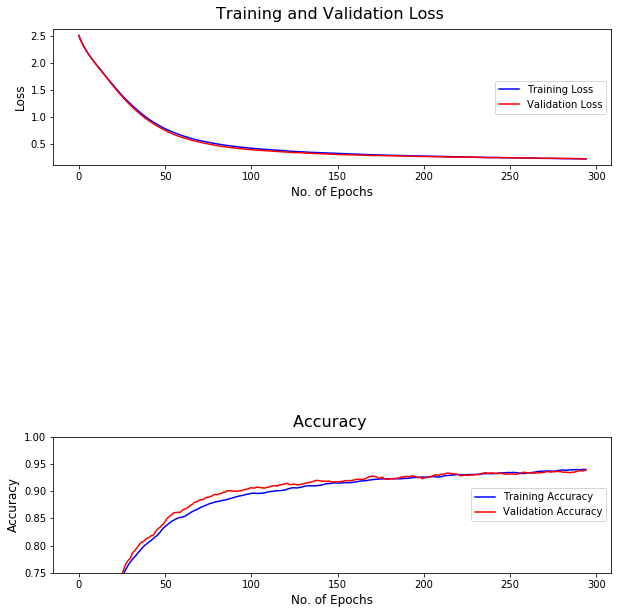

In [7]:
parameters = train(train_x_norm, train_y_encoded,dev_x_norm, dev_y_encoded,layers_dim, hyperParams, initialization = "he", optimizer = 'adam',regularizer = 'l2')

## Making Predictions

In [8]:
prediction_train,train_acc,_ = predict(train_x_norm, train_y_encoded,parameters)
prediction_dev,dev_acc, _ = predict(dev_x_norm, dev_y_encoded,parameters)
prediction_test,test_acc,_ = predict(test_x_norm, test_y_encoded,parameters)

print("+===========+===========+===============+")
print("| Dataset   | Accuracy \t| Error Rate \t|") 
print("+===========+===========+===============+")
print("| Training  | %.4f \t| %.4f \t|"%(train_acc, 1-train_acc))
print("| Dev       | %.4f \t| %.4f \t|"%(dev_acc, 1-dev_acc))      
print("| Test      | %.4f \t| %.4f \t|"%(test_acc, 1-test_acc))      

print("+===========+===========+===============+")

+===========+===========+===============+
| Dataset   | Accuracy 	| Error Rate 	|
+===========+===========+===============+
| Training  | 0.9397 	| 0.0603 	|
| Dev       | 0.9400 	| 0.0600 	|
| Test      | 0.9336 	| 0.0664 	|
+===========+===========+===============+


## Confusion Matrix

In [9]:
cm_train = confusion_matrix(train_y_sample,prediction_train)

cm_dev = confusion_matrix(dev_y_sample,prediction_dev)

cm_test = confusion_matrix(test_y_sample,prediction_test)

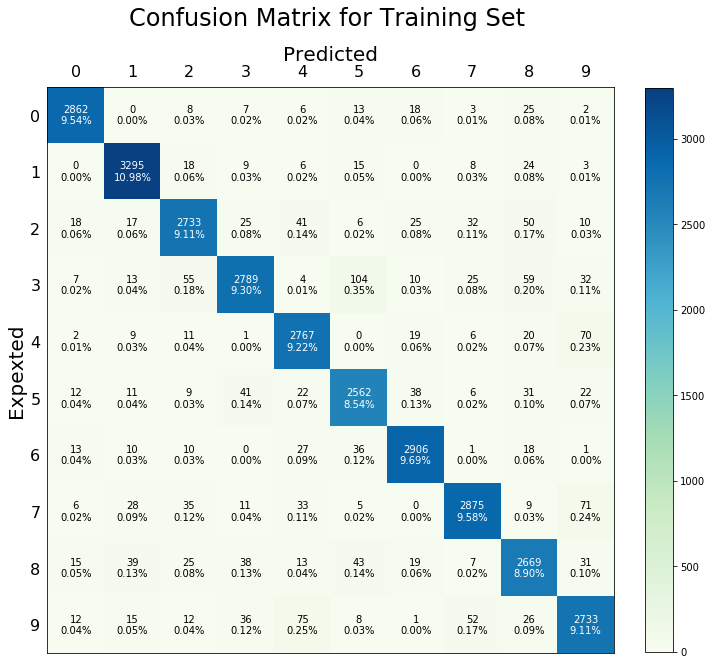

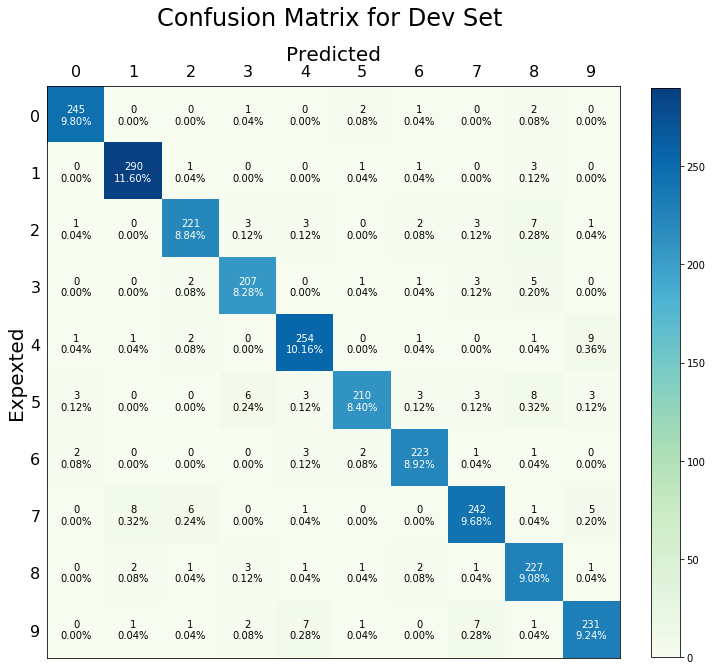

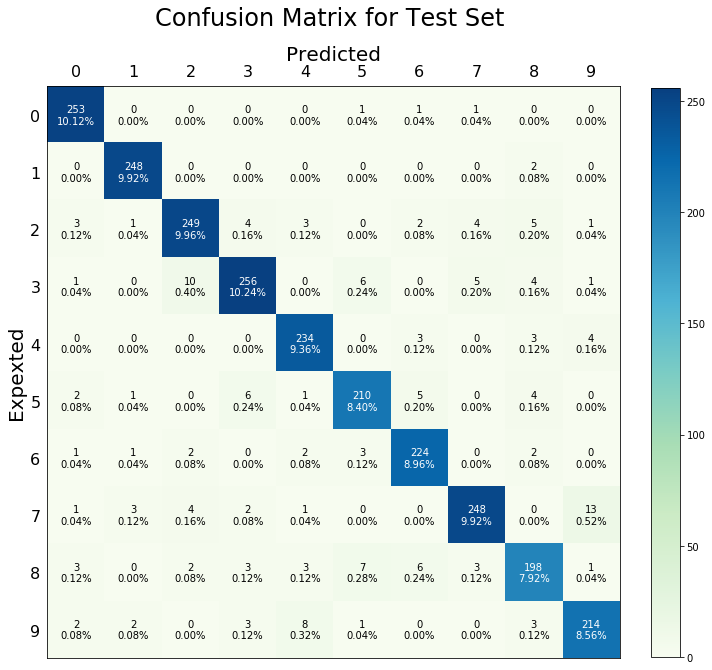

In [10]:
#plotting the confusion matrix   
plot_confusion_matrix(cm_train, dataset = "training")
plot_confusion_matrix(cm_dev, dataset = "dev")
plot_confusion_matrix(cm_test, dataset = "test")

## Prediction Summary

In [11]:
summary(cm_train)

+===============+===============+===============+===============+
| Label 	| Precision 	| Recall 	| F1 Score 	|
+===============+===============+===============+===============+
| 0 		|  0.97116 	|  0.97215 	|  0.97165 	|
| 1 		|  0.95868 	|  0.97543 	|  0.96698 	|
| 2 		|  0.93724 	|  0.92425 	|  0.93070 	|
| 3 		|  0.94319 	|  0.90026 	|  0.92122 	|
| 4 		|  0.92418 	|  0.95250 	|  0.93813 	|
| 5 		|  0.91762 	|  0.93028 	|  0.92391 	|
| 6 		|  0.95718 	|  0.96161 	|  0.95939 	|
| 7 		|  0.95357 	|  0.93557 	|  0.94448 	|
| 8 		|  0.91061 	|  0.92066 	|  0.91561 	|
| 9 		|  0.91866 	|  0.92020 	|  0.91943 	|
+===============+===============+===============+===============+
| Macro Avg 	|  0.93921 	|  0.93929 	|  0.93915 	|
+===============+===============+===============+===============+

 Accuracy 		  0.93970


In [12]:
summary(cm_dev)

+===============+===============+===============+===============+
| Label 	| Precision 	| Recall 	| F1 Score 	|
+===============+===============+===============+===============+
| 0 		|  0.97222 	|  0.97610 	|  0.97416 	|
| 1 		|  0.96026 	|  0.97973 	|  0.96990 	|
| 2 		|  0.94444 	|  0.91701 	|  0.93053 	|
| 3 		|  0.93243 	|  0.94521 	|  0.93878 	|
| 4 		|  0.93382 	|  0.94424 	|  0.93900 	|
| 5 		|  0.96330 	|  0.87866 	|  0.91904 	|
| 6 		|  0.95299 	|  0.96121 	|  0.95708 	|
| 7 		|  0.93077 	|  0.92015 	|  0.92543 	|
| 8 		|  0.88672 	|  0.94979 	|  0.91717 	|
| 9 		|  0.92400 	|  0.92032 	|  0.92216 	|
+===============+===============+===============+===============+
| Macro Avg 	|  0.94010 	|  0.93924 	|  0.93932 	|
+===============+===============+===============+===============+

 Accuracy 		  0.94000


In [13]:
summary(cm_test)

+===============+===============+===============+===============+
| Label 	| Precision 	| Recall 	| F1 Score 	|
+===============+===============+===============+===============+
| 0 		|  0.95113 	|  0.98828 	|  0.96935 	|
| 1 		|  0.96875 	|  0.99200 	|  0.98024 	|
| 2 		|  0.93258 	|  0.91544 	|  0.92393 	|
| 3 		|  0.93431 	|  0.90459 	|  0.91921 	|
| 4 		|  0.92857 	|  0.95902 	|  0.94355 	|
| 5 		|  0.92105 	|  0.91703 	|  0.91904 	|
| 6 		|  0.92946 	|  0.95319 	|  0.94118 	|
| 7 		|  0.95019 	|  0.91176 	|  0.93058 	|
| 8 		|  0.89593 	|  0.87611 	|  0.88591 	|
| 9 		|  0.91453 	|  0.91845 	|  0.91649 	|
+===============+===============+===============+===============+
| Macro Avg 	|  0.93265 	|  0.93359 	|  0.93295 	|
+===============+===============+===============+===============+

 Accuracy 		  0.93360


## Visualizing Prediction

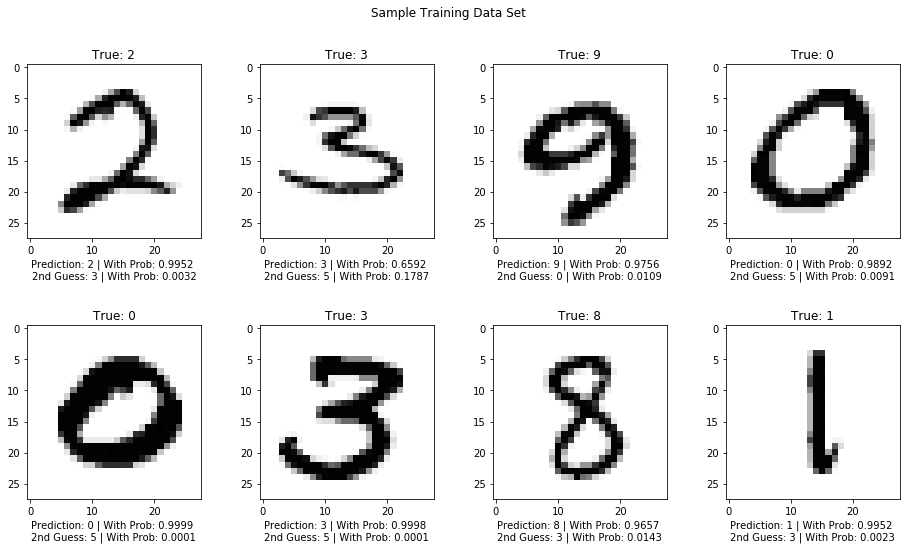

In [14]:
visualize_prediction(train_x_sample, train_y_sample.T, prediction_train, dataset = "training")

## Visualizing Mislabelled Images

In [ ]:
visualize_mislabelled_images(train_x_sample, train_y_sample.T,prediction_train,dataset = "training")

Total Mislabelled Images: 1809


## Making Prediction on Real World Image

In [ ]:
from PIL import Image
from dataPrep import one_hot_encoding

In [ ]:
image_name = "8_1.jpg" 
label = np.array([8]).reshape(1,1)

fname = "dataset/" + image_name

image_data =255 - np.asarray(Image.open(fname).convert('L').resize((28,28)))
image_flattened = image_data.reshape(image_data.shape[0]*image_data.shape[1],-1)
image_norm =(image_flattened/255.)

label_encoded = one_hot_encoding(label)

prediction,acc,_ = predict(image_norm, label_encoded, parameters)


first_lbl, first_prob = prediction["First Prediction"]
sec_lbl, sec_prob = prediction["Second Prediction"]

plt.title("True Label: "+ str(label.squeeze()))
plt.xlabel("1st Prediction: %d | With Prob: %.4f \n2nd Prediction: %d | With Prob: %.4f"%(first_lbl, first_prob, sec_lbl, sec_prob))
plt.imshow(image_data, interpolation ='nearest',cmap='binary')
plt.colorbar()


## Saving Trained Model

In [ ]:
save_model(file_name = "test_final_model_adam_dropout", parameters = parameters)

## Loading Pre-Trained Model

In [ ]:
loaded_params = load_model(file_name = "final_model_adam_dropout")
# loaded_params = load_model(file_name = "final_model_adam_l2")

In [ ]:
L = len(loaded_params) // 2
print("Total Layers %d: "%L)

for l in range(L):
    print(loaded_params["W" + str(l+1)].shape)


In [ ]:
prediction_train,train_acc,_ = predict(train_x_norm, train_y_encoded,loaded_params)
prediction_dev,dev_acc, _ = predict(dev_x_norm, dev_y_encoded,loaded_params)
prediction_test,test_acc,_ = predict(test_x_norm, test_y_encoded,loaded_params)

print("+===========+===========+===============+")
print("| Dataset   | Accuracy \t| Error Rate \t|") 
print("+===========+===========+===============+")
print("| Training  | %.4f \t| %.4f \t|"%(train_acc, 1-train_acc))
print("| Dev       | %.4f \t| %.4f \t|"%(dev_acc, 1-dev_acc))      
print("| Test      | %.4f \t| %.4f \t|"%(test_acc, 1-test_acc))      

print("+===========+===========+===============+")